In [145]:
import numpy as np
import pandas as pd
import requests
import zipfile
import io
from scipy import sparse
from mf import encode_data, encode_new_data, create_embedings, gradient_descent, cost, df2matrix

In [126]:
# dowload dataset zip file and extract it
def download_dataset(url):
  r = requests.get(url)
  z = zipfile.ZipFile(io.BytesIO(r.content))
  z.extractall('.')

url = 'https://files.grouplens.org/datasets/movielens/ml-latest-small.zip'
download_dataset(url)
df = pd.read_csv('ml-latest-small/ratings.csv')

# split data to train and test
train=df.sample(frac=0.8,random_state=200)
test=df.drop(train.index)

train_df, num_users, num_movies = encode_data(train)
test_df, _, _ = encode_data(test)
K = 50  # Number of factors in the embedding
emb_user = create_embedings(num_users, K)
emb_movie = create_embedings(num_movies, K)
emb_user, emb_movie, history = gradient_descent(train_df, emb_user, emb_movie, iterations=2500, learning_rate=1, has_val=True, df_val=test_df)

0 12.13413788086993 12.063888260894213
50 9.949634075037704 11.387754504270793
100 7.102371022276428 10.297978510914417
150 5.034906257880455 9.137346399388726
200 3.886763507158329 8.145913164184824
250 3.176292520937378 7.339301725783322
300 2.692170857082481 6.676865207588732
350 2.3448282321839855 6.125370716703083
400 2.085723853377218 5.660304872213357
450 1.8861522117453609 5.263421501619584
500 1.7282814388556582 4.921109223648767
550 1.600580855151452 4.623127297138419
600 1.4953268618233553 4.361663138080093
650 1.407182580685797 4.130662951624416
700 1.3323581490978522 3.925363530392265
750 1.2680964711159177 3.7419632843334374
800 1.2123479726326485 3.5773881246250965
850 1.1635590366687951 3.429122323875172
900 1.1205310172141465 3.2950844958218557
950 1.0823242625090959 3.1735353897678733
1000 1.048191493012076 3.0630084479288366
1050 1.0175307012594557 2.9622568675196153
1100 0.9898512687407218 2.8702127766236254
1150 0.9647491850241017 2.7859554024833875
1200 0.94188863

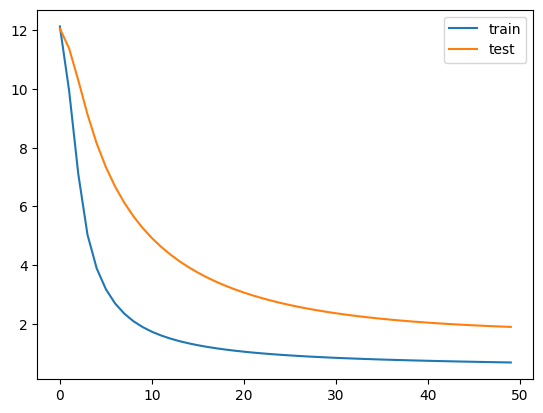

In [127]:
from matplotlib import pyplot as plt

plt.plot(history['train'], label='train')
plt.plot(history['val'], label='test')
plt.legend()

In [128]:
user_id = 42
user_embedding = emb_user[user_id]
item_embeddings = emb_movie
predicted_ratings = np.dot(user_embedding, item_embeddings.T)

In [130]:
test_df.where(test_df['userId'] == 42).dropna().astype(int)

,userId,movieId,rating
6317,42,934,5
6329,42,121,5
6331,42,935,5
6333,42,124,3
6338,42,399,5
6342,42,128,4
6352,42,936,4
6356,42,937,5
6360,42,106,3
6374,42,269,5


In [131]:
round(predicted_ratings[124])

3

In [144]:
Y = df2matrix(train_df, num_users, num_movies)
user_movie = [i for i in np.array(Y.todense())[42]]
unseen_movies = [movie_id for movie_id, rating in enumerate(user_movie) if rating == 0.0]
predictions = []
for id in unseen_movies:
  predictions.append((id, round(predicted_ratings[id])))

predictions.sort(key=lambda x: x[1])

predictions[-10:]

[(4531, 5),
 (4566, 5),
 (4680, 5),
 (4854, 5),
 (5408, 5),
 (5441, 5),
 (5646, 5),
 (5811, 5),
 (6119, 5),
 (7780, 5)]